# Example Backtesting Simple Moving Average

In [1]:
# Setup of Environment
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [2]:
# Variable Definitition
url = 'https://raw.githubusercontent.com/SimonaRoja/kevin/main/NetflixStockPriceHistory.csv' #input file
sma = 10 #used simple moving average

In [3]:
# Read CSV & Sort by Date Ascending
data = pd.read_csv(url, index_col=0, parse_dates=True) #Read csv, use 1st column as index and interpret date
data = data.sort_index(ascending=True) #Sort ascending

In [4]:
# Display Data
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2002-05-24,1.21,1.21,1.22,1.20,11.10M,0.83%
2002-05-28,1.16,1.21,1.23,1.16,6.61M,-4.13%
2002-05-29,1.10,1.16,1.16,1.09,6.76M,-5.17%
2002-05-30,1.07,1.11,1.11,1.07,10.15M,-2.73%
2002-05-31,1.08,1.08,1.08,1.07,8.46M,0.93%
...,...,...,...,...,...,...
2022-03-24,375.71,379.76,379.76,368.90,3.89M,0.33%
2022-03-25,373.85,377.07,377.64,366.43,3.58M,-0.50%
2022-03-28,378.51,375.23,380.28,366.73,4.32M,1.25%


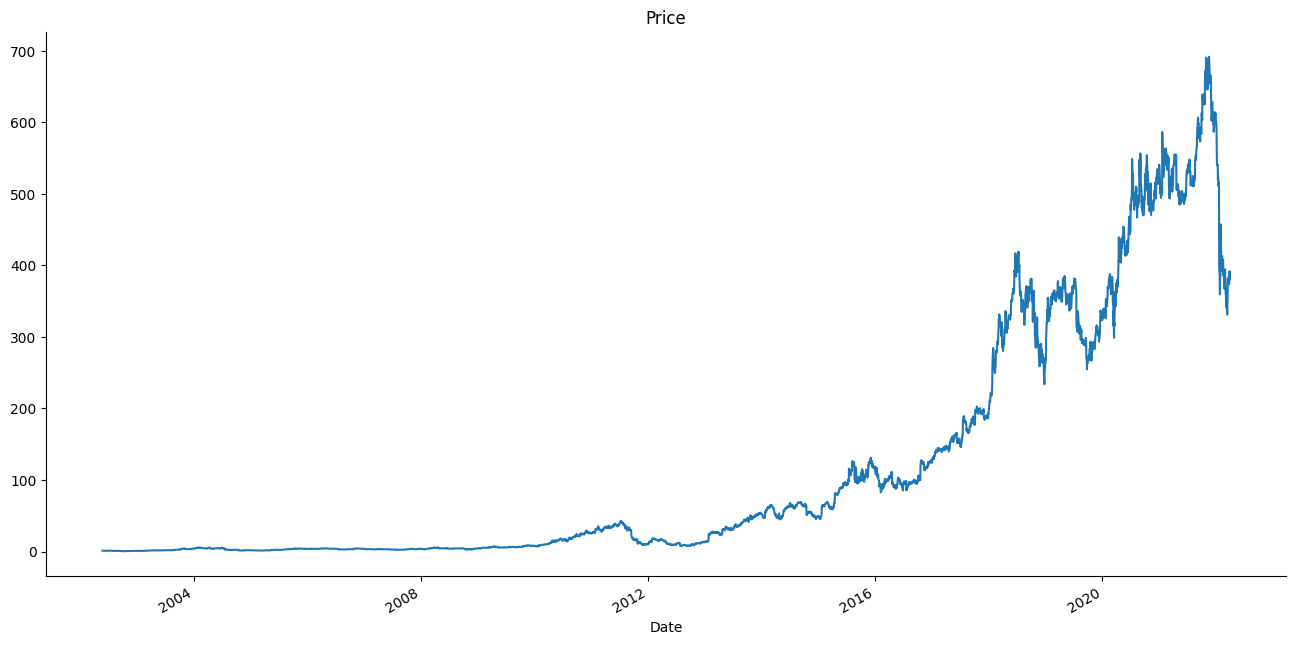

In [5]:
# Display Data as Graph
data['Price'].plot(kind='line', figsize=(16, 8), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Create Simple Moving Average
data['SMA'] = data['Price'].rolling(sma).mean()

In [7]:
data

,Price,Open,High,Low,Vol.,Change %,SMA
Date,,,,,,,
2002-05-24,1.21,1.21,1.22,1.20,11.10M,0.83%,NaN
2002-05-28,1.16,1.21,1.23,1.16,6.61M,-4.13%,NaN
2002-05-29,1.10,1.16,1.16,1.09,6.76M,-5.17%,NaN
2002-05-30,1.07,1.11,1.11,1.07,10.15M,-2.73%,NaN
2002-05-31,1.08,1.08,1.08,1.07,8.46M,0.93%,NaN
...,...,...,...,...,...,...,...
2022-03-24,375.71,379.76,379.76,368.90,3.89M,0.33%,363.232
2022-03-25,373.85,377.07,377.64,366.43,3.58M,-0.50%,366.585
2022-03-28,378.51,375.23,380.28,366.73,4.32M,1.25%,371.335


In [8]:
# Drop Lines without Value (SMA is NaN)
data = data.dropna()

In [9]:
data

,Price,Open,High,Low,Vol.,Change %,SMA
Date,,,,,,,
2002-06-07,1.12,1.18,1.18,1.10,1.37M,-5.08%,1.132
2002-06-10,1.16,1.13,1.17,1.13,484.40K,3.57%,1.127
2002-06-11,1.15,1.16,1.19,1.13,1.00M,-0.86%,1.126
2002-06-12,1.09,1.15,1.18,1.09,1.80M,-5.22%,1.125
2002-06-13,1.08,1.10,1.12,1.08,2.57M,-0.92%,1.126
...,...,...,...,...,...,...,...
2022-03-24,375.71,379.76,379.76,368.90,3.89M,0.33%,363.232
2022-03-25,373.85,377.07,377.64,366.43,3.58M,-0.50%,366.585
2022-03-28,378.51,375.23,380.28,366.73,4.32M,1.25%,371.335


In [10]:
# Identify all Dates where the price is below SMA (more complexity with High & Low can be added afterwards)
# Use 1 for True and 0 for False => Either to calculate afterwards

data.loc[:, 'Price_Below_SMA'] = np.where(data['SMA'] > data['Price'], 1, 0)

<ipython-input-10-a1c07484aa0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Price_Below_SMA'] = np.where(data['SMA'] > data['Price'], 1, 0)


In [11]:
# Calculate the Simple Moving Average again - only if is all days below the value is 1
data.loc[:, 'SMA_Below_SMA'] = data['Price_Below_SMA'].rolling(sma).mean()

<ipython-input-11-85385102b5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'SMA_Below_SMA'] = data['Price_Below_SMA'].rolling(sma).mean()


In [12]:
data

,Price,Open,High,Low,Vol.,Change %,SMA,Price_Below_SMA,SMA_Below_SMA
Date,,,,,,,,,
2002-06-07,1.12,1.18,1.18,1.10,1.37M,-5.08%,1.132,1,NaN
2002-06-10,1.16,1.13,1.17,1.13,484.40K,3.57%,1.127,0,NaN
2002-06-11,1.15,1.16,1.19,1.13,1.00M,-0.86%,1.126,0,NaN
2002-06-12,1.09,1.15,1.18,1.09,1.80M,-5.22%,1.125,1,NaN
2002-06-13,1.08,1.10,1.12,1.08,2.57M,-0.92%,1.126,1,NaN
...,...,...,...,...,...,...,...,...,...
2022-03-24,375.71,379.76,379.76,368.90,3.89M,0.33%,363.232,0,0.3
2022-03-25,373.85,377.07,377.64,366.43,3.58M,-0.50%,366.585,0,0.2
2022-03-28,378.51,375.23,380.28,366.73,4.32M,1.25%,371.335,0,0.1


In [13]:
# You can filter the data manually for SMA_Below_SMA
data = data.dropna()
data

,Price,Open,High,Low,Vol.,Change %,SMA,Price_Below_SMA,SMA_Below_SMA
Date,,,,,,,,,
2002-06-20,0.96,0.97,1.04,0.95,6.11M,1.05%,1.033,1,0.8
2002-06-21,0.98,0.98,0.99,0.95,2.35M,2.08%,1.019,1,0.8
2002-06-24,0.98,0.98,1.01,0.96,2.57M,0.00%,1.001,1,0.9
2002-06-25,0.96,0.99,1.01,0.95,3.94M,-2.04%,0.982,1,1.0
2002-06-26,0.99,0.96,1.00,0.92,2.92M,3.13%,0.972,0,0.9
...,...,...,...,...,...,...,...,...,...
2022-03-24,375.71,379.76,379.76,368.90,3.89M,0.33%,363.232,0,0.3
2022-03-25,373.85,377.07,377.64,366.43,3.58M,-0.50%,366.585,0,0.2
2022-03-28,378.51,375.23,380.28,366.73,4.32M,1.25%,371.335,0,0.1


Another Example File

In [14]:
# Variable Definitition
url = 'https://raw.githubusercontent.com/SimonaRoja/kevin/main/pyalgo_eikon_eod_data.csv' #input file
symbol = 'SPY'

In [15]:
# Read CSV & Sort by Date Ascending
data = pd.read_csv(url, index_col=0, parse_dates=True) #Read csv, use 1st column as index and interpret date
data = data.sort_index(ascending=True) #Sort ascending

In [16]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.3500,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33
2019-12-30,291.520000,157.590,59.62,1846.89,229.80,321.08,3221.29,14.82,1.1197,1515.1230,29.49,142.63


In [17]:
data = data.dropna()

In [18]:
# Get only a Specific Symbol from the Data
data = pd.DataFrame(data[symbol])

In [19]:
data

,SPY
Date,
2010-01-04,113.33
2010-01-05,113.63
2010-01-06,113.71
2010-01-07,114.19
2010-01-08,114.57
...,...
2019-12-24,321.23
2019-12-26,322.94
2019-12-27,322.86


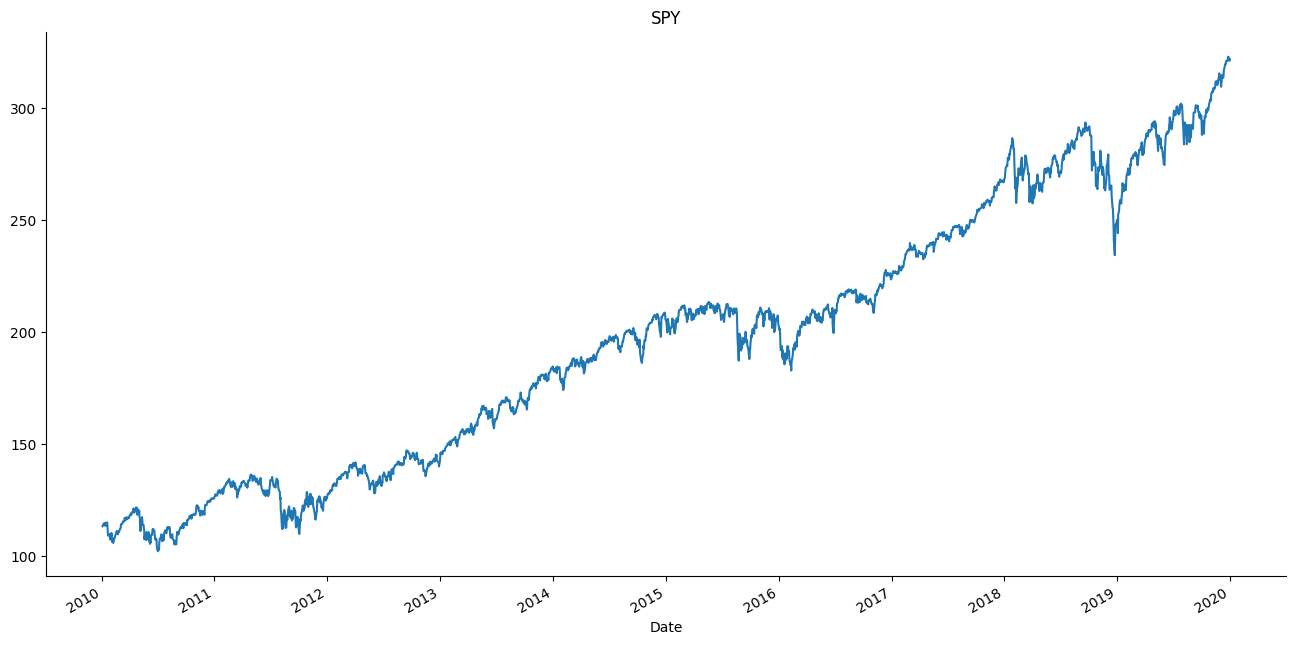

In [20]:
data[symbol].plot(kind='line', figsize=(16, 8), title=symbol)
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
# Create Simple Moving Average
data['SMA'] = data[symbol].rolling(sma).mean()
data = data.dropna()

In [24]:
data

,SPY,SMA
Date,,
2010-01-15,113.64,114.101
2010-01-19,115.06,114.274
2010-01-20,113.89,114.300
2010-01-21,111.70,114.099
2010-01-22,109.21,113.601
...,...,...
2019-12-24,321.23,319.161
2019-12-26,322.94,320.013
2019-12-27,322.86,320.586


In [26]:
# Identify all Dates where the price is below SMA (more complexity with High & Low can be added afterwards)
# Use 1 for True and 0 for False => Either to calculate afterwards

data.loc[:, 'Price_Below_SMA'] = np.where(data['SMA'] > data[symbol], 1, 0)

<ipython-input-26-097e73d1cb5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Price_Below_SMA'] = np.where(data['SMA'] > data[symbol], 1, 0)


In [27]:
# Calculate the Simple Moving Average again - only if is all days below the value is 1
data.loc[:, 'SMA_Below_SMA'] = data['Price_Below_SMA'].rolling(sma).mean()

<ipython-input-27-85385102b5de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'SMA_Below_SMA'] = data['Price_Below_SMA'].rolling(sma).mean()


In [28]:
data

,SPY,SMA,Price_Below_SMA,SMA_Below_SMA
Date,,,,
2010-01-15,113.64,114.101,1,NaN
2010-01-19,115.06,114.274,0,NaN
2010-01-20,113.89,114.300,1,NaN
2010-01-21,111.70,114.099,1,NaN
2010-01-22,109.21,113.601,1,NaN
...,...,...,...,...
2019-12-24,321.23,319.161,0,0.0
2019-12-26,322.94,320.013,0,0.0
2019-12-27,322.86,320.586,0,0.0


from matplotlib import pyplot as plt
data['SPY'].plot(kind='hist', bins=20, title='SPY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['SMA'].plot(kind='hist', bins=20, title='SMA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Price_Below_SMA'].plot(kind='hist', bins=20, title='Price_Below_SMA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['SMA_Below_SMA'].plot(kind='hist', bins=20, title='SMA_Below_SMA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SPY', y='SMA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SMA', y='Price_Below_SMA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Price_Below_SMA', y='SMA_Below_SMA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['SPY'].plot(kind='line', figsize=(8, 4), title='SPY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['SMA'].plot(kind='line', figsize=(8, 4), title='SMA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Price_Below_SMA'].plot(kind='line', figsize=(8, 4), title='Price_Below_SMA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['SMA_Below_SMA'].plot(kind='line', figsize=(8, 4), title='SMA_Below_SMA')
plt.gca().spines[['top', 'right']].set_visible(False)

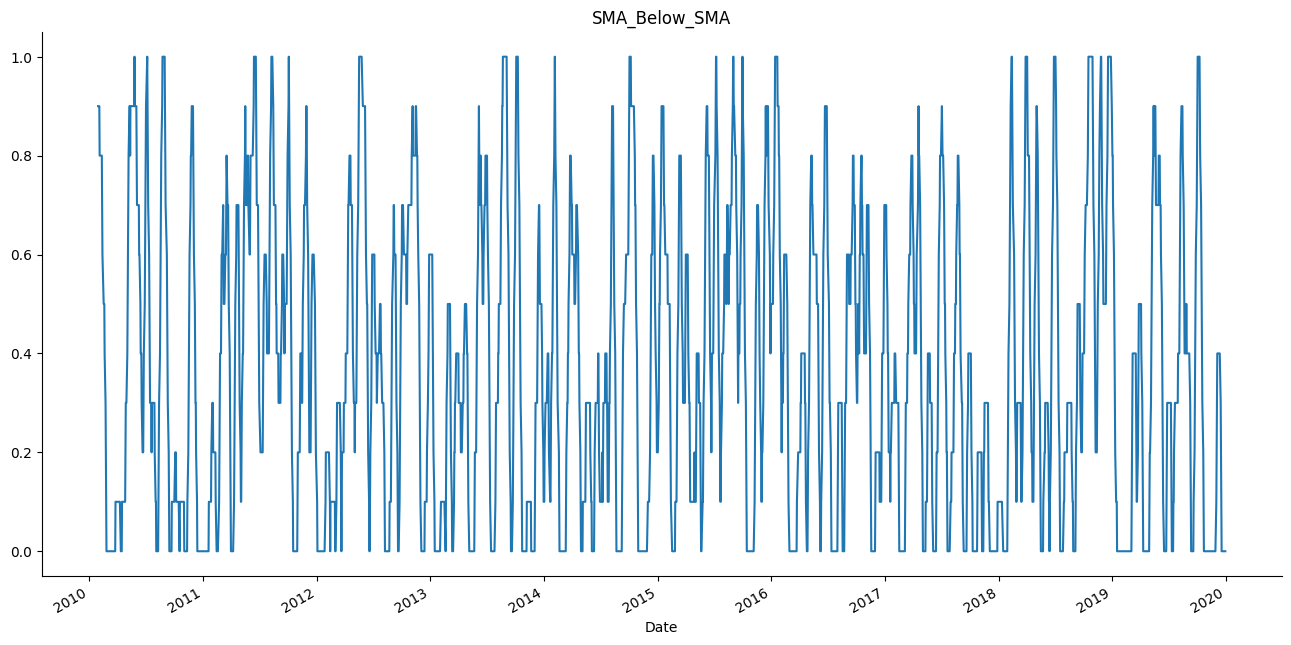

In [30]:
from matplotlib import pyplot as plt
data['SMA_Below_SMA'].plot(kind='line', figsize=(16, 8), title='SMA_Below_SMA')
plt.gca().spines[['top', 'right']].set_visible(False)